In [1]:
#Stock Market (S&P 500) Sigma (standard deviation) Analysis
#created by John Broberg on 2022-05-29

#source: https://www.nasdaq.com/market-activity/index/spx/historical

#cd
#cd Desktop/StockMarketSigma
#git pull https://github.com/JohnBroberg/StockMarketSigma.git


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = 'HistoricalData_1655565273630.csv'
df = pd.read_csv(data)

df


,Date,Close/Last,Volume,Open,High,Low
0,06/17/2022,3674.84,--,3665.90,3707.71,3636.87
1,06/16/2022,3666.77,--,3728.18,3728.18,3639.77
2,06/15/2022,3789.99,--,3764.05,3837.56,3722.30
3,06/14/2022,3735.48,--,3763.52,3778.18,3705.68
4,06/13/2022,3749.63,--,3838.15,3838.15,3734.30
...,...,...,...,...,...,...
2546,06/22/2012,1335.02,--,1325.92,1337.82,1325.92
2547,06/21/2012,1325.51,--,1355.43,1358.27,1324.41
2548,06/20/2012,1355.69,--,1358.04,1361.57,1346.45
2549,06/19/2012,1357.98,--,1344.83,1363.46,1344.83


In [2]:
df.describe()

,Close/Last,Open,High,Low
count,2551.000000,2551.000000,2551.000000,2551.000000
mean,2597.652050,2574.259463,2587.444681,2559.742266
std,874.559104,918.058161,923.807861,911.305176
min,1313.720000,0.000000,0.000000,0.000000
25%,1974.125000,1966.445000,1978.465000,1958.395000
50%,2399.380000,2399.940000,2405.770000,2387.190000
75%,2991.090000,2989.490000,3002.655000,2975.585000
max,4796.560000,4804.510000,4818.620000,4780.040000


In [3]:
#remove holidays (Open == 0)

df = df.loc[~(df['Open']==0)]
df.describe()

,Close/Last,Open,High,Low
count,2518.000000,2518.000000,2518.000000,2518.000000
mean,2608.299345,2607.996779,2621.354797,2593.289325
std,874.765314,875.133842,880.729397,868.523798
min,1313.720000,1314.090000,1324.240000,1309.270000
25%,1981.775000,1980.137500,1988.585000,1972.132500
50%,2425.540000,2426.615000,2435.090000,2410.815000
75%,2997.460000,2998.287500,3007.705000,2983.745000
max,4796.560000,4804.510000,4818.620000,4780.040000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2518 entries, 0 to 2550
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        2518 non-null   object 
 1   Close/Last  2518 non-null   float64
 2   Volume      2518 non-null   object 
 3   Open        2518 non-null   float64
 4   High        2518 non-null   float64
 5   Low         2518 non-null   float64
dtypes: float64(4), object(2)
memory usage: 137.7+ KB


In [5]:
df.shape

(2518, 6)

In [6]:
df.isnull().any()

Date          False
Close/Last    False
Volume        False
Open          False
High          False
Low           False
dtype: bool

<function matplotlib.pyplot.show(close=None, block=None)>

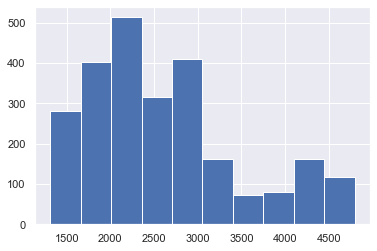

In [7]:
sns.set()

plt.hist(df['Close/Last'])
plt.show

In [8]:
close_current = df['Close/Last'].iloc[0]
close_current

3674.84

In [9]:
close_mean = df['Close/Last'].mean()
close_mean

2608.2993447180393

In [10]:
close_sd = df['Close/Last'].std()
close_sd

874.7653141962957

In [11]:
sigma1 = close_mean + close_sd
sigma1

3483.064658914335

In [12]:
sigma2 = close_mean + (2 * close_sd)
sigma2

4357.829973110631

In [13]:
sigma3 = close_mean + (3 * close_sd)
sigma3

5232.595287306926

Text(0.5, 1.0, 'Density: S&P 500 Daily Close/Last - 06/12/2012 to 06/10/2022')

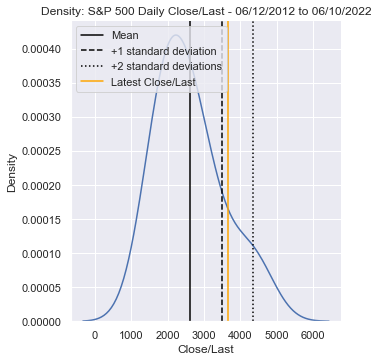

In [14]:
# Using Kernal Density Estimation (kde) to approximate probability density function
# https://seaborn.pydata.org/tutorial/distributions.html#kernel-density-estimation
#bw_adjust: adjust bandwidth to smoothe out modalities

sns.displot(df['Close/Last'], kind='kde', bw_adjust=3.0) 

if close_current > sigma2:
    c = 'red'
elif close_current > sigma1:
    c = 'orange'
else: 
    c = 'green'

plt.axvline(close_mean, color='black', label='Mean')
plt.axvline(sigma1, color='black', linestyle='--', label='+1 standard deviation')
plt.axvline(sigma2, color='black', linestyle=':', label='+2 standard deviations')
plt.axvline(close_current, color=c, label='Latest Close/Last')
plt.legend(loc='upper left')
plt.title('Density: S&P 500 Daily Close/Last - 06/18/2012 to 06/17/2022')

In [15]:
z_score = (close_current - close_mean)/close_sd
z_score

1.2192306187424244

In [16]:
cols = ['Date','Close/Last']
df1 = df.loc[:,cols]
df1['Date'] = pd.to_datetime(df1['Date'], format = "%m/%d/%Y" )
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2518 entries, 0 to 2550
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        2518 non-null   datetime64[ns]
 1   Close/Last  2518 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 59.0 KB


Text(0.5, 1.0, 'S&P 500 Daily Close/Last - 06/12/2012 to 06/10/2022')

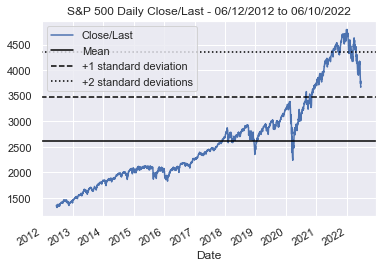

In [17]:
df1.plot(x='Date', y='Close/Last')
plt.axhline(close_mean, color='black', label='Mean')
plt.axhline(sigma1, color='black', linestyle='--', label='+1 standard deviation')
plt.axhline(sigma2, color='black', linestyle=':', label='+2 standard deviations')
plt.legend()
plt.title('S&P 500 Daily Close/Last - 06/18/2012 to 06/17/2022')
